In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [2]:
import nltk
nltk.download('omw-1.4')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
emotion_train = pd.read_csv('training.csv')

In [4]:
emotion_train['label_name'] = emotion_train['label'].map({0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'})
counts = emotion_train['label_name'].value_counts()
counts

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label_name, dtype: int64

<Axes: >

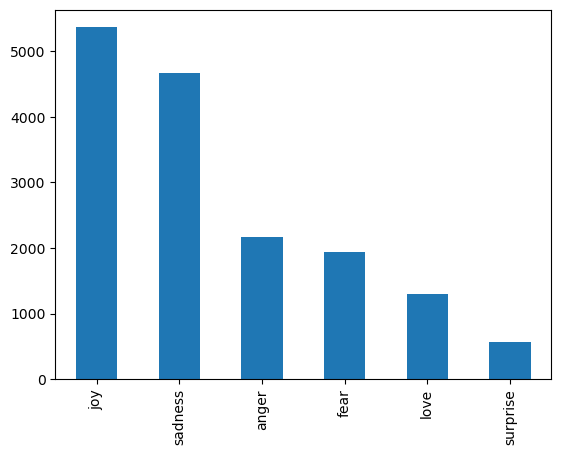

In [5]:
counts.plot(kind='bar')

In [6]:
emotion_train['text_length'] = emotion_train['text'].astype(str).apply(len)
emotion_train

,text,label,label_name,text_length
0,i didnt feel humiliated,0,sadness,23
1,i can go from feeling so hopeless to so damned...,0,sadness,108
2,im grabbing a minute to post i feel greedy wrong,3,anger,48
3,i am ever feeling nostalgic about the fireplac...,2,love,92
4,i am feeling grouchy,3,anger,20
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,101
15996,i am now turning and i feel pathetic that i am...,0,sadness,102
15997,i feel strong and good overall,1,joy,30
15998,i feel like this was such a rude comment and i...,3,anger,59


C:\Users\abhin\AppData\Local\Temp\ipykernel_10876\2672079223.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(emotion_train['text_length'], bins=50)


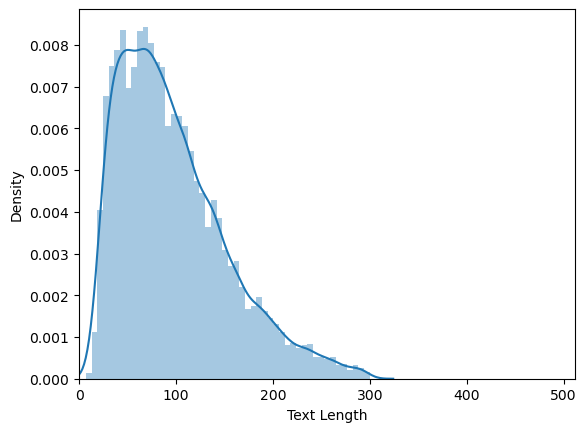

In [7]:
sns.distplot(emotion_train['text_length'], bins=50)
plt.xlim([0, 512]);
plt.xlabel('Text Length');

In [8]:
emotion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         16000 non-null  object
 1   label        16000 non-null  int64 
 2   label_name   16000 non-null  object
 3   text_length  16000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 500.1+ KB


In [9]:
emotion_train.isnull().sum()

text           0
label          0
label_name     0
text_length    0
dtype: int64

## NLP cleaning

#### Stemming

In [10]:
def stemming(word_corpus):
    texts = []
    stemming = PorterStemmer()
    lines = emotion_train['text'].tolist()
    for line in lines:
        line = line.lower()
        line = re.sub('[^A-Za-z]', ' ', line)
        list_of_words = line.split()
        after_stemming = [stemming.stem(word) for word in list_of_words if word not in stopwords.words('english')]
        reviews = ' '.join(after_stemming)
        texts.append(reviews)
    return texts

#### Lemmatizing

In [11]:
def lemmatizing(word_corpus):
    texts = []
    lem = WordNetLemmatizer()
    lines = emotion_train['text'].tolist()
    for line in lines:
        line = line.lower()
        line = re.sub('[^A-Za-z]', ' ', line)
        list_of_words = line.split()
        after_lemmatizing = [lem.lemmatize(word, 'v') for word in list_of_words if word not in stopwords.words('english')]
        reviews = ' '.join(after_lemmatizing)
        texts.append(reviews)
    return texts

In [12]:
texts = stemming(emotion_train['text'])
texts[:5]

['didnt feel humili',
 'go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi']

In [13]:
lemat_texts = lemmatizing(emotion_train['text'])
lemat_texts[:5]

['didnt feel humiliate',
 'go feel hopeless damn hopeful around someone care awake',
 'im grab minute post feel greedy wrong',
 'ever feel nostalgic fireplace know still property',
 'feel grouchy']

In [14]:
cv = CountVectorizer(max_features = 1000)
X_train = cv.fit_transform(lemat_texts)
y_train = emotion_train['label']

In [15]:
tv = TfidfVectorizer(max_features= 1000)
X_train_tf = tv.fit_transform(lemat_texts)

In [27]:
test_data = pd.read_csv('test.csv')

In [28]:
test_data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [29]:
tests = []
stemming = PorterStemmer()
lines = test_data['text'].tolist()
for line in lines:
    sentence = re.sub('[^a-zA-Z]', ' ', line)
    lower_case = sentence.lower()
    listofwords = lower_case.split()
    after_stemming = [stemming.stem(word) for word in listofwords if word not in stopwords.words('english')]
    review = ' '.join(after_stemming)
    tests.append(review)

In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [31]:
X_test = cv.transform(tests).toarray()
X_test_tf = tv.transform(tests).toarray()
y_test = test_data['label']
y_test

0       0
1       0
2       0
3       1
4       0
       ..
1995    3
1996    3
1997    1
1998    1
1999    4
Name: label, Length: 2000, dtype: int64

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [33]:
psagc = PassiveAggressiveClassifier()
psagc.fit(X_train_tf, y_train)

PassiveAggressiveClassifier()

In [34]:
y_pred_psagc = psagc.predict(X_test_tf)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_test, y_pred_psagc))
print()
print(classification_report(y_test, y_pred_psagc))

[[326 149  29  44  32   1]
 [104 439  69  60  14   9]
 [ 18  56  65  12   5   3]
 [ 55  63  13 127  16   1]
 [ 41  63  25  15  67  13]
 [ 17  18   4   3   8  16]]

              precision    recall  f1-score   support

           0       0.58      0.56      0.57       581
           1       0.56      0.63      0.59       695
           2       0.32      0.41      0.36       159
           3       0.49      0.46      0.47       275
           4       0.47      0.30      0.37       224
           5       0.37      0.24      0.29        66

    accuracy                           0.52      2000
   macro avg       0.46      0.43      0.44      2000
weighted avg       0.52      0.52      0.52      2000



In [37]:
import tensorflow as tf

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train)

MultinomialNB()

Predicting on training data

In [40]:
y_pred = mnb.predict(X_train_tf)

In [41]:
print(confusion_matrix(y_train, y_pred))
print()
print(classification_report(y_train, y_pred))

[[4390  235    0   26   15    0]
 [ 143 5184   16   11    8    0]
 [  97  645  534   22    6    0]
 [ 289  269    3 1566   32    0]
 [ 227  251    2   63 1392    2]
 [ 116  226    1    4   96  129]]

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4666
           1       0.76      0.97      0.85      5362
           2       0.96      0.41      0.57      1304
           3       0.93      0.73      0.81      2159
           4       0.90      0.72      0.80      1937
           5       0.98      0.23      0.37       572

    accuracy                           0.82     16000
   macro avg       0.89      0.66      0.71     16000
weighted avg       0.85      0.82      0.81     16000



Predicting on testing data

In [42]:
y_pred = mnb.predict(X_test_tf)

In [43]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[367 200   3   5   6   0]
 [ 68 613   3   9   2   0]
 [ 25 108  21   3   1   1]
 [ 78 104   2  90   1   0]
 [ 63 104   1   4  52   0]
 [ 17  34   0   1  10   4]]

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       581
           1       0.53      0.88      0.66       695
           2       0.70      0.13      0.22       159
           3       0.80      0.33      0.47       275
           4       0.72      0.23      0.35       224
           5       0.80      0.06      0.11        66

    accuracy                           0.57      2000
   macro avg       0.69      0.38      0.40      2000
weighted avg       0.63      0.57      0.53      2000



In [44]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear', C=1000, gamma=0.0001)
svc.fit(X_train, y_train)

In [ ]:
y_pred_svc = svc.predict(X_train_tf)
print(classification_report(y_pred_svc, y_train))
print()

In [ ]:
y1_pred = svc.predict(X_test_tf)

In [ ]:
print(classification_report(y1_pred, y_test))

In [ ]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, verbose=2)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
new_svm_pred = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, new_svm_pred))
print()
print(classification_report(y_test, new_svm_pred))

In [45]:
from sklearn.ensemble import Random

SyntaxError: invalid syntax (3212224099.py, line 1)